In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../python')
import dataPython as dp

# First gas attempt (not enough points)

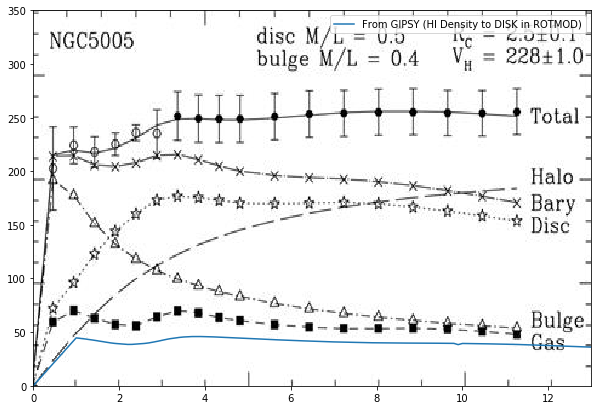

In [6]:
dat_import = dp.getXYZdata('rotmod.dat')
r = dat_import['xx']
v_file = dat_import['zz']
img=plt.imread("bg_crop.png")

plt.figure(figsize=(10,8))

plt.plot(r,v_file,label='From GIPSY (HI Density to DISK in ROTMOD)')
plt.imshow(img,extent=[0,13,0,350],aspect=0.025)

plt.legend(loc='upper right')
plt.ylim([0,350])
plt.xlim([0,13])
plt.show()

Figure 9 ^

So it looks like I might've gotten the gas component, but as it turns out I followed the instructions incorrectly - I used the bulge component instead of the disk component

# Successful! Gas component

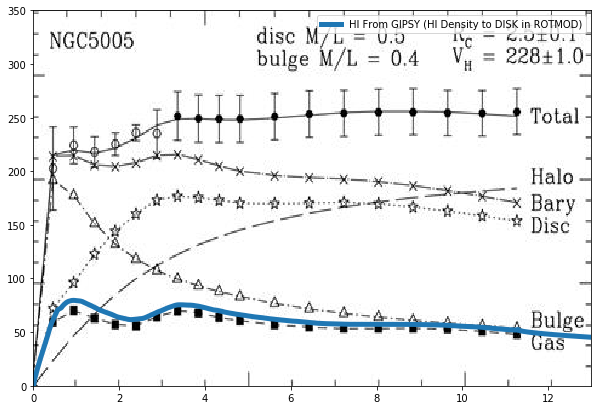

In [9]:
dat2_import = dp.getXYZdata('rotmod_gas.dat')
r2 = dat2_import['xx']
v2_file = dat2_import['zz']

plt.figure(figsize=(10,8))
plt.imshow(img,extent=[0,13,0,350],aspect=0.025)

plt.plot(r2,v2_file,label='HI From GIPSY (HI Density to DISK in ROTMOD)',linewidth=5)

plt.legend(loc='upper right')
plt.ylim([0,350])
plt.xlim([0,13])
plt.show()

It's hard to tell whether the image and axes are lined up correctly, but we at least have what looks like the correct shape.

# Unscaled gas component comparison w/ data thief

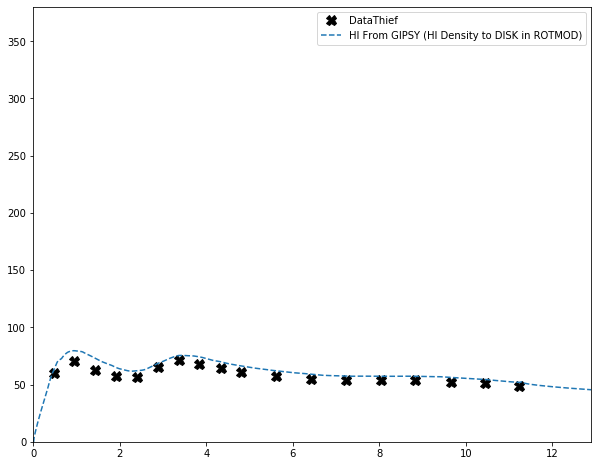

In [10]:
fromplot_import = dp.getXYdata('gas.txt')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']

plt.figure(figsize=(10,8))

plt.plot(r_fromplot,v_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(r2,v2_file,'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# Below: Gas output scaled by .9 (fitted by eye)

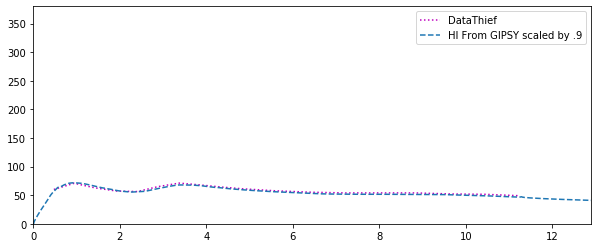

In [11]:
v2_file = [x * .9 for x in v2_file]

plt.figure(figsize=(10,4))
#plt.plot(r_fromplot2,v_fromplot2,'X',color='black',markersize=10,label='DataThief2')
plt.plot(r_fromplot,v_fromplot,':',color='m',markersize=10,label='DataThief')
plt.plot(r2,v2_file,'--',label='HI From GIPSY scaled by .9')

plt.legend()
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# First (failed) bulge attempt

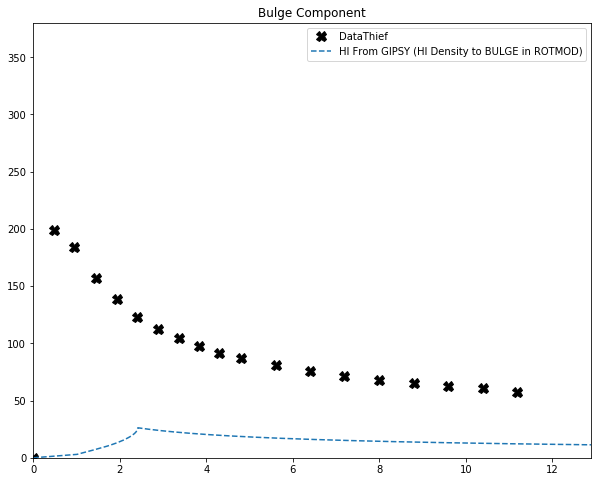

In [12]:
bfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_bulge.txt')
rb_fromplot = bfromplot_import['xx']
vb_fromplot = bfromplot_import['yy']

dfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_disk.txt')
rd_fromplot = dfromplot_import['xx']
vd_fromplot = dfromplot_import['yy']

b_import = dp.getXYZdata('rotmod_bulge.dat')
rb = b_import['xx']
vb = b_import['zz']

plt.figure(figsize=(10,8))

plt.title('Bulge Component')
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rb,vb,'--',label='HI From GIPSY (HI Density to BULGE in ROTMOD)')

plt.legend()
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# First (failed) disk attempt

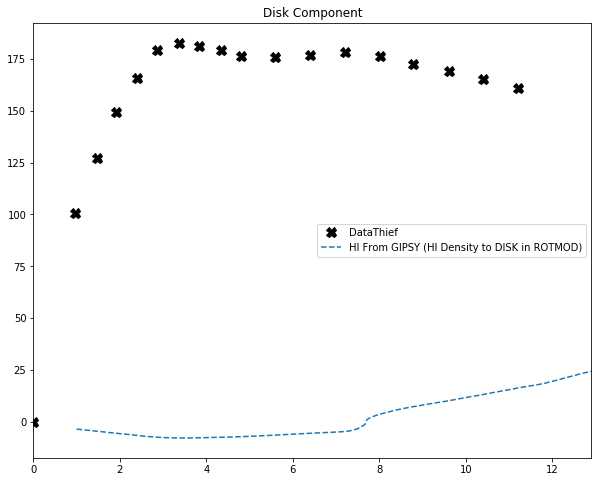

In [13]:
d_import = dp.getXYZdata('rotmod_disk.dat')
rd = d_import['xx']
vd = d_import['zz']

plt.figure(figsize=(10,8))

plt.title('Disk Component')
plt.plot(rd_fromplot,vd_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rd,vd,'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
#plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# Scaling Comparison:

Check how changing the M/L ratio affects scaling.

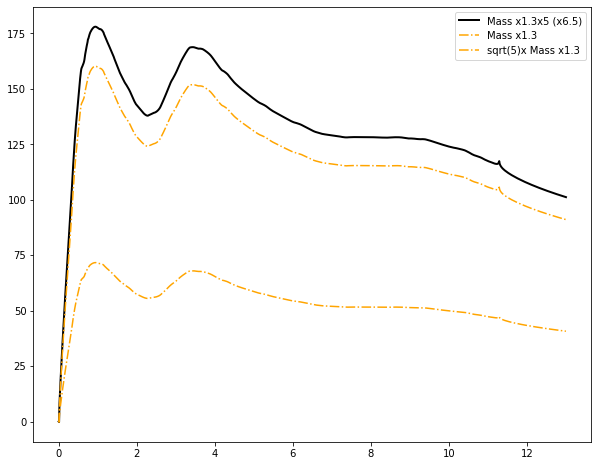

In [14]:
x5_import = dp.getXYZdata('rotmod_gas_x5.dat')
rx5 = x5_import['xx']
vx5_file = x5_import['zz']

plt.figure(figsize=(10,8))

plt.plot(rx5,vx5_file,color='black',linewidth=2,label='Mass x1.3x5 (x6.5)')
plt.plot(r2,v2_file,'-.',color='orange',label='Mass x1.3')
plt.plot(r2,5**(1/2)*np.asarray(v2_file),'-.',color='orange',label='sqrt(5)x Mass x1.3')

plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

This lined up before - the source file must have been overwritten?
The conclusion was that the prefactor is the square root of the M/L ratio.

# Below: gipsy disk component w/ 1E-6 applied to distance
## further scaled by 55

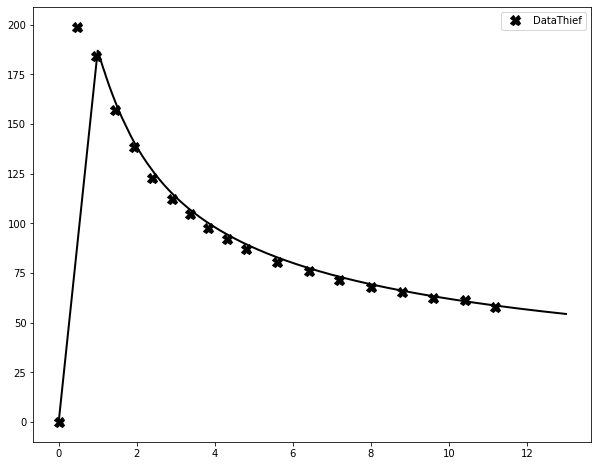

In [15]:
xb2_import = dp.getXYZdata('try3_adjust-dist.txt')
rb2 = xb2_import['xx']
vb2_file = xb2_import['zz']

plt.figure(figsize=(10,8))

plt.plot(rb2,55*np.asarray(vb2_file),color='black',linewidth=2)
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')

plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

# Attempt (?) at bulge density profile

No handles with labels found to put in legend.


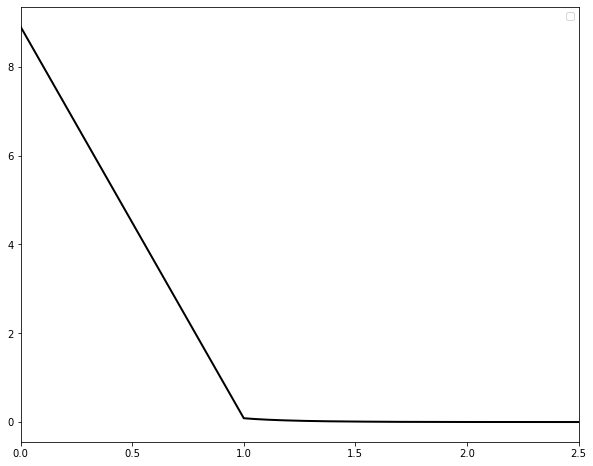

In [19]:
densb2 = xb2_import['yy']
plt.figure(figsize=(10,8))

plt.plot(rb2,densb2,color='black',linewidth=2)

plt.xlim([0,2.5])
plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

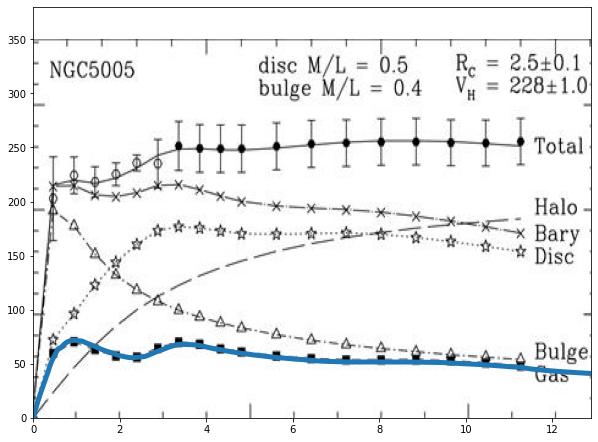

In [20]:
dat_import_corrected = dp.getXYZdata('gas_correct_z0.txt')
r = dat_import['xx']
v_file = dat_import['zz']

plt.figure(figsize=(10,8))

img=plt.imread("bg_crop.png")
plt.imshow(img,extent=[0,13,0,350],aspect=0.025)

plt.plot(r2,v2_file,label='HI From GIPSY (HI Density to DISK in ROTMOD)',linewidth=5)

#plt.legend(loc='upper right')
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# Below: gipsy disk component w/ 1E-6 applied to distance
## further scaled to 3.8


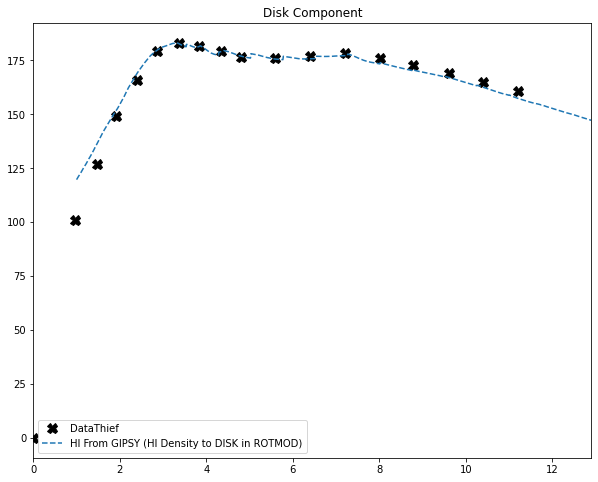

In [21]:
d_import = dp.getXYZdata('disk_change-dist.dat')
rd = d_import['xx']
vd = d_import['zz']

plt.figure(figsize=(10,8))

plt.title('Disk Component')
plt.plot(rd_fromplot,vd_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rd,3.8*np.asarray(vd),'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
plt.xlim([0,12.9])
plt.show()

## Compare Saved File through ROTMOD to only through ROTMOD

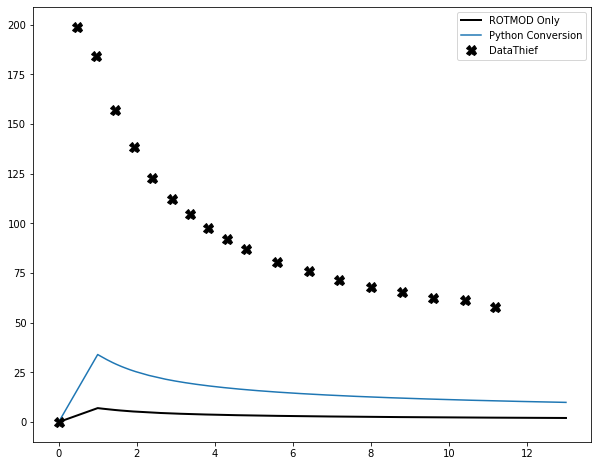

In [17]:
rot_import = dp.getXYZdata('bulge_rotmod-mag.txt')
r_rot = rot_import['xx']
v_rot = rot_import['zz']

py_import = dp.getXYZdata('bulge_from-python.dat')
r_py = py_import['xx']
v_py = py_import['zz']

plt.figure(figsize=(10,8))

plt.plot(r_rot,v_rot,color='black',linewidth=2,label='ROTMOD Only')
plt.plot(r_py,v_py,label='Python Conversion')
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')

plt.legend()
plt.show()

### With Scaling

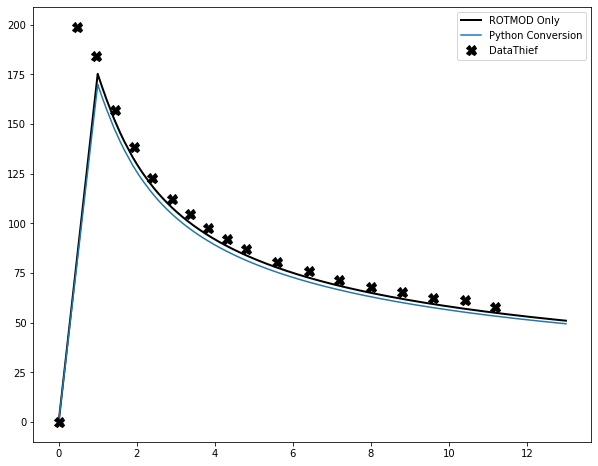

In [23]:
plt.figure(figsize=(10,8))

plt.plot(r_rot,25*np.asarray(v_rot),color='black',linewidth=2,label='ROTMOD Only')
plt.plot(r_py,5*np.asarray(v_py),label='Python Conversion')
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')

plt.legend()
plt.show()